In [ ]:
!pip install request_html
!pip install yahoo_fin

In [3]:
from yahoo_fin import stock_info as si

In [59]:
pr = si.get_live_price('PETR4.SA')

In [60]:
pr

27.34000015258789

In [6]:
#pegar os dividendos
df = si.get_dividends('PETR4.SA',start_date='2021-07-01',end_date='2022-07-01')

In [25]:
df

,dividend,ticker
2021-08-17,1.609911,PETR4.SA
2021-12-02,3.250487,PETR4.SA
2022-04-14,2.970249,PETR4.SA
2022-05-24,3.715490,PETR4.SA


In [7]:
#somar todos os dividendos e calcular o DY do periodp
DY = ( df['dividend'].sum() / pr)  * 100 

#Criando loop para extração das contações in live

In [39]:
import time
from datetime import datetime, timezone
import pandas as pd
from pytz import timezone

In [40]:
n=1 #1 minuto
tempo = time.time() + 60*n
#tempo em formato de float

In [42]:
a = 0
df = pd.DataFrame(columns=['Hora','Preço'])
while time.time() < tempo:
  preco = round(si.get_live_price('PETR4.SA'),2)
  tempo_real = datetime.fromtimestamp(time.time())
  fuso_horario = timezone('America/Sao_Paulo')

  tempo_real =tempo_real.astimezone(fuso_horario)
  #ajustar o timezone do brazil

  tempo_real = tempo_real.strftime("%d-%b-%Y %H:%M:%S")
  d = { 'Hora': tempo_real,'Preço': preco}

  print(d)

  linha = pd.DataFrame (data= d,index=[a])

  a +=1

  df = pd.concat([df,linha], ignore_index=True)
  #esperar 5 segundos
  time.sleep(5)


{'Hora': '06-Jul-2022 14:54:53', 'Preço': 27.36}
{'Hora': '06-Jul-2022 14:54:58', 'Preço': 27.36}
{'Hora': '06-Jul-2022 14:55:04', 'Preço': 27.36}
{'Hora': '06-Jul-2022 14:55:09', 'Preço': 27.36}
{'Hora': '06-Jul-2022 14:55:14', 'Preço': 27.37}
{'Hora': '06-Jul-2022 14:55:19', 'Preço': 27.37}
{'Hora': '06-Jul-2022 14:55:24', 'Preço': 27.36}
{'Hora': '06-Jul-2022 14:55:29', 'Preço': 27.37}
{'Hora': '06-Jul-2022 14:55:35', 'Preço': 27.38}
{'Hora': '06-Jul-2022 14:55:40', 'Preço': 27.38}


In [45]:
df

,Hora,Preço
0,06-Jul-2022 14:54:53,27.36
1,06-Jul-2022 14:54:58,27.36
2,06-Jul-2022 14:55:04,27.36
3,06-Jul-2022 14:55:09,27.36
4,06-Jul-2022 14:55:14,27.37
5,06-Jul-2022 14:55:19,27.37
6,06-Jul-2022 14:55:24,27.36
7,06-Jul-2022 14:55:29,27.37
8,06-Jul-2022 14:55:35,27.38
9,06-Jul-2022 14:55:40,27.38


In [46]:
df.index=df['Hora']

In [52]:
df

,Hora,Preço
Hora,,
06-Jul-2022 14:54:53,06-Jul-2022 14:54:53,27.36
06-Jul-2022 14:54:58,06-Jul-2022 14:54:58,27.36
06-Jul-2022 14:55:04,06-Jul-2022 14:55:04,27.36
06-Jul-2022 14:55:09,06-Jul-2022 14:55:09,27.36
06-Jul-2022 14:55:14,06-Jul-2022 14:55:14,27.37
06-Jul-2022 14:55:19,06-Jul-2022 14:55:19,27.37
06-Jul-2022 14:55:24,06-Jul-2022 14:55:24,27.36
06-Jul-2022 14:55:29,06-Jul-2022 14:55:29,27.37
06-Jul-2022 14:55:35,06-Jul-2022 14:55:35,27.38


In [ ]:
#excluir da coluna Hora pois ja tem no index
df.drop(['Hora'], axis = 1, inplace = True)

In [54]:
df

,Preço
Hora,
06-Jul-2022 14:54:53,27.36
06-Jul-2022 14:54:58,27.36
06-Jul-2022 14:55:04,27.36
06-Jul-2022 14:55:09,27.36
06-Jul-2022 14:55:14,27.37
06-Jul-2022 14:55:19,27.37
06-Jul-2022 14:55:24,27.36
06-Jul-2022 14:55:29,27.37
06-Jul-2022 14:55:35,27.38


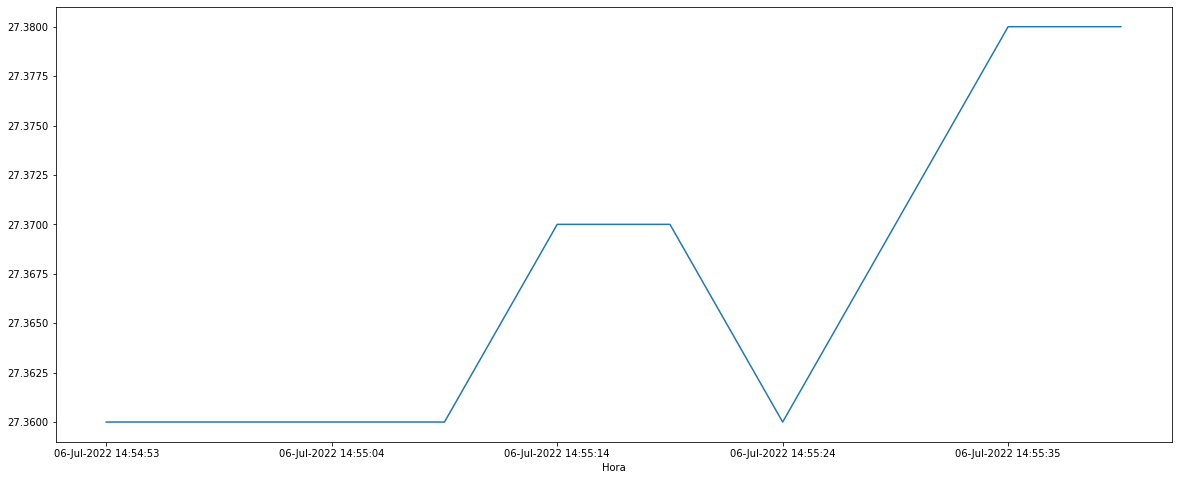

In [56]:
df['Preço'].plot(figsize= (20,8));